# **Introduction**
> In this notebook, I will be analyzing 'Job Skills for Data Science' dataset. Firstly I will be analyzing which skill is popular for aquiring Jobs in the DS field.

## Table of contents
> 1. **[Load the data](#load_the_data)** 
> 2.  **[Which skill is popular for aquiring Jobs in the DS field?](#skill_popularity)**
> 3. **[Majoring in what field is beneficial for getting a job? ](#degree_popularity)**
> 4. **[How many years of experiences are needed for Data Science Jobs?](#years_experiences)** 
> 5. **[Which location offers more numer of Data Science jobs? ](#location_job)**
> 6. **[Which job categories have more jobs?](#job_categories_popularity)**
> 7. **[Let's find out in which category ](#pop_cat_location)**

In [1]:
 
# For example, here's several helpful packages to load in 
# pandas for handling our dataset
import pandas as pd
# numpy for numeric operations
import numpy as np
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# seaborn for visualizations
import seaborn as sns
# regular expression
import re
# print inline in this notebook
%matplotlib inline


<a id="load_the_data"></a>

# 1. Load the data

In [46]:
# reading the data set using pandas .read_csv() method
df_job_skills = pd.read_csv('job_skills2.csv')
# print the top 5 row from the dataframe
df_job_skills.head()

,Company,JobTitle,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Unnamed: 7
0,Google,Data Science Development Program- Junior Data ...,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,NaN
1,Google,Data Science Development Program- Junior Data ...,Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",NaN
2,Google,Data Science Development Program- Junior Data ...,Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,NaN
3,Google,Data Science Development Program- Junior Data ...,Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",NaN
4,Google,Data Science Development Program- Junior Data ...,Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,NaN


<a id="skill_popularity"></a>
# 2. Which skills are asked most in demand for Data Science Jobs?
> In this section, I will be analyzing which skills are necessary to land a Data Science job. 

In [3]:
# most popular language list 
language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#']

In [28]:
# get our Minimum Qualifications column and convert all of the values to a list
minimum_qualifications = df_job_skills['Minimum Qualifications'].tolist()
# let's join our list to a single string and lower case the letter
miniumum_qualifications_string = "".join(str(v) for v in minimum_qualifications).lower()

In [29]:
# find out which language occurs in most in minimum Qualifications string
wordcount = dict((x,0) for x in language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15}


In [6]:
# sort the dict
skills_list =  ['Python', 'R Language', 'Sql', 'SPSS', 'SAS', 'Excel', 'Tableau', 'Hadoop','RapidMiner','MicroStrategy']
language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [9]:
# make a new dataframe using programming_language_popularity for easy use cases
df_popular_lang = pd.DataFrame(language_popularity,columns=['Skills','Popularity'])
# Capitalize each programming language first letter
df_popular_lang['Skills'] = skills_list
df_popular_lang = df_popular_lang[::-1]

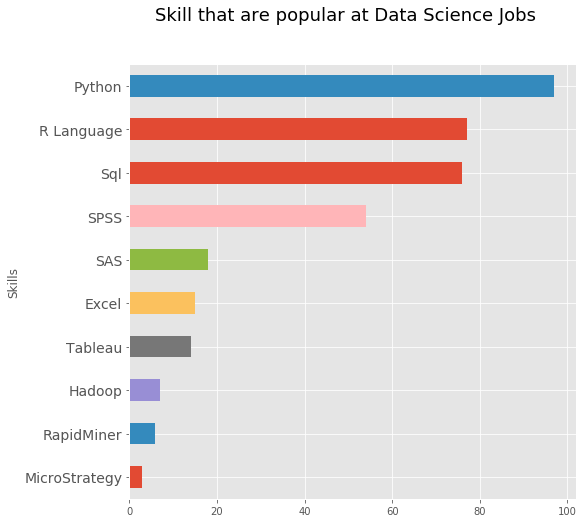

In [11]:
# plot
df_popular_lang.plot.barh(x='Skills',y='Popularity',figsize=(8,8), legend=False)
# add a suptitle
plt.suptitle("Skill that are popular at Data Science Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

**Wow! It's look like Python hold the first position.**

<a id="degree_popularity"></a>

# 3. Majoring in which degree is preferred most for landing a data Science job ?
> In this section, I will analyze which degree is the most popular.

In [30]:
miniumum_qualifications_string = " ".join(str(v) for v in minimum_qualifications)

In [31]:
degree_list = ["BA", "BS", "Master's","PhD"]

In [32]:
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)


{'BA': 838, 'BS': 879, "Master's": 49, 'PhD': 8}


In [33]:
majors_list= ['MS in Applied Data Science','Master of Science in Information Systems', 'Master of Science in Business Analytics','M.S. in Applied Mathematics - Data Analytics']
degree_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [34]:
df_degree_popular = pd.DataFrame(degree_popularity,columns=['Major','Popularity'])
df_degree_popular['Major'] = majors_list

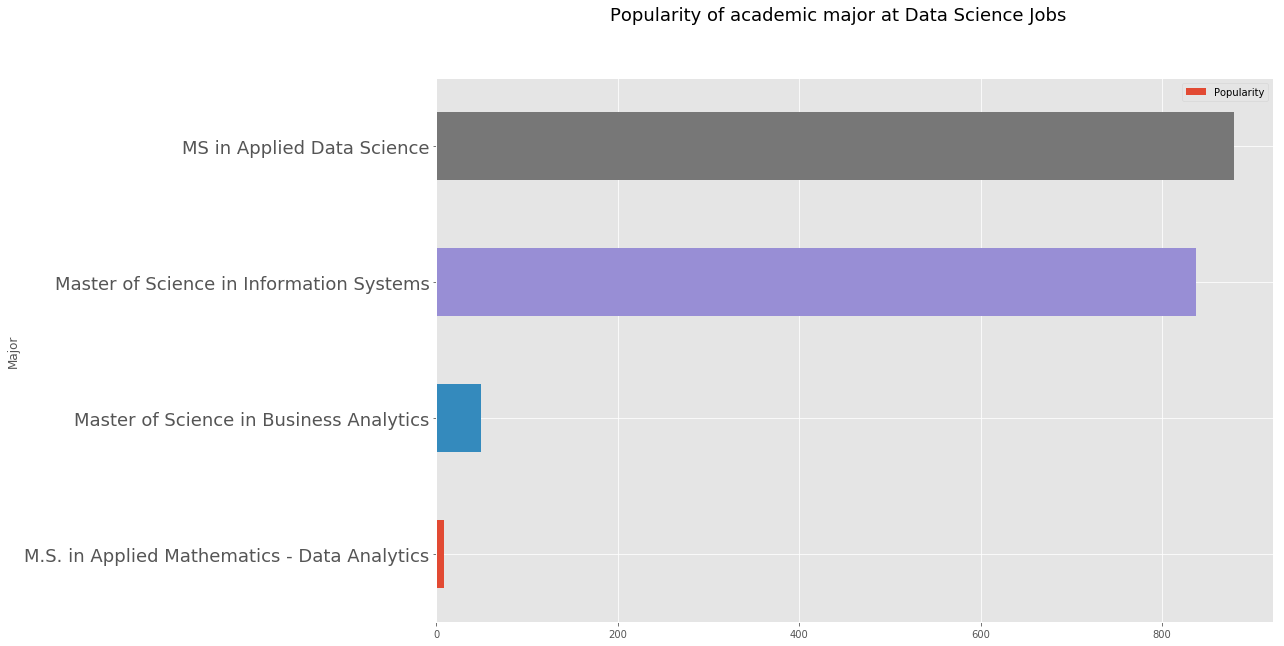

In [35]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.barh(x='Major',y='Popularity',figsize=(15,10), stacked=True)
# add a suptitle
plt.suptitle("Popularity of academic major at Data Science Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

### It's look like MS in Applied Data Science and MS in Information Systems degrees are most popular at DS Jobs

<a id="years_experiences"></a>

# 4. How many years of experiences are needed for getting a Data Scientist Job?
> In this section, I will analyze how many years of experience are needed to get a job . 

In [36]:
# this portion of code is taken from https://www.kaggle.com/djcarlos/are-you-experienced-enough-to-work-at-google 
years_exp = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
     years_exp[w] += 1
        
print(years_exp)

defaultdict(<function <lambda> at 0x000001F8CB7F5488>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


In [37]:
years_exp = sorted(years_exp.items(), key=lambda kv: kv[1], reverse=True)

In [39]:
df_years_exp = pd.DataFrame(years_exp,columns=['Years of experience','Popularity'])
df_years_exp['Years of experience'] = ['2','3','1','4','6','5','0','0.5','1.5','1','9','10','13','11','14']
df_years_exp = df_years_exp[::-1] 

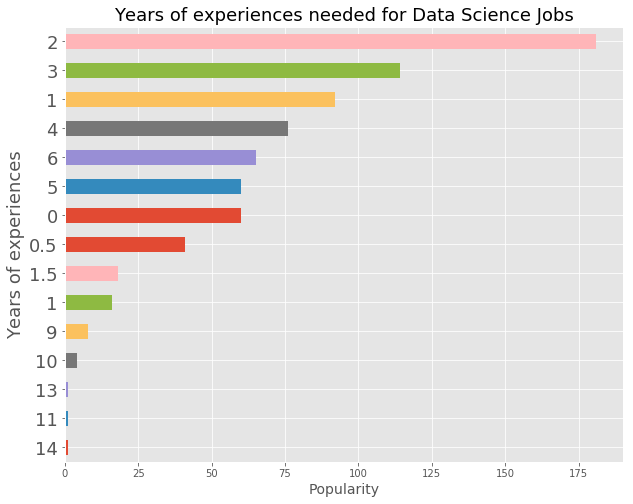

In [40]:
# plot
df_years_exp.plot.barh(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Data Science Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

### It's look like most of the jobs require atleast 2 years of experience. 

<a id="location_job"></a>

# 5. Which location has more opening in the Data Science field? 
 

In [41]:
# where is most job located
threshold = 10
location_value_counts = df_job_skills.Location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
df_job_skills['Location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = df_job_skills.Location.value_counts()
location_value_counts = location_value_counts[::-1]

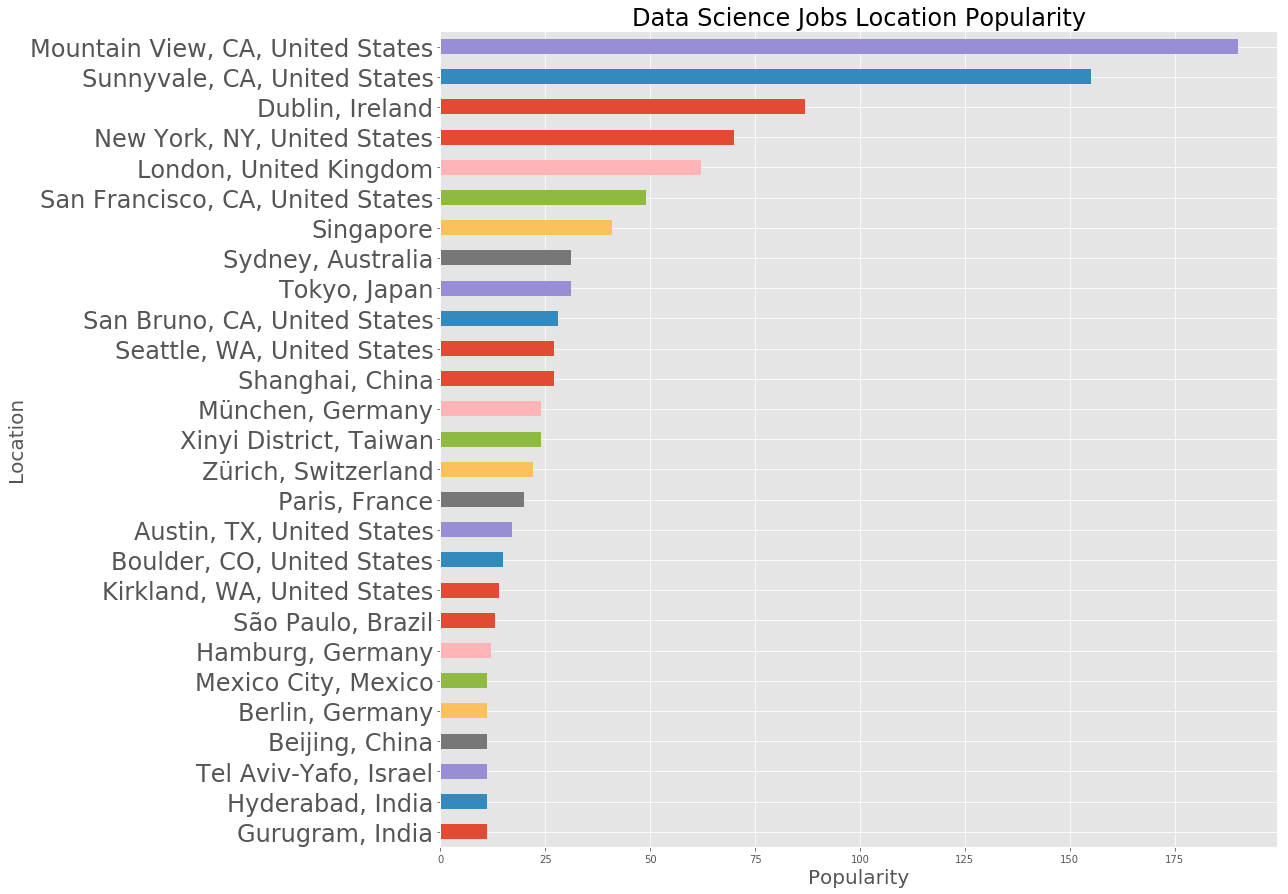

In [42]:
location_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("Data Science Jobs Location Popularity", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
# change xticks fontsize to 14
plt.yticks(fontsize=24)
# finally show the plot
plt.show()

### It's look like most Data Science Jobs are from United States and Ireland

<a id="job_categories_popularity"></a>

# 7. Which roles are more suitable for college graduates ?
> Data Science jobs have many job roles. Let's find out which categories have more jobs. 

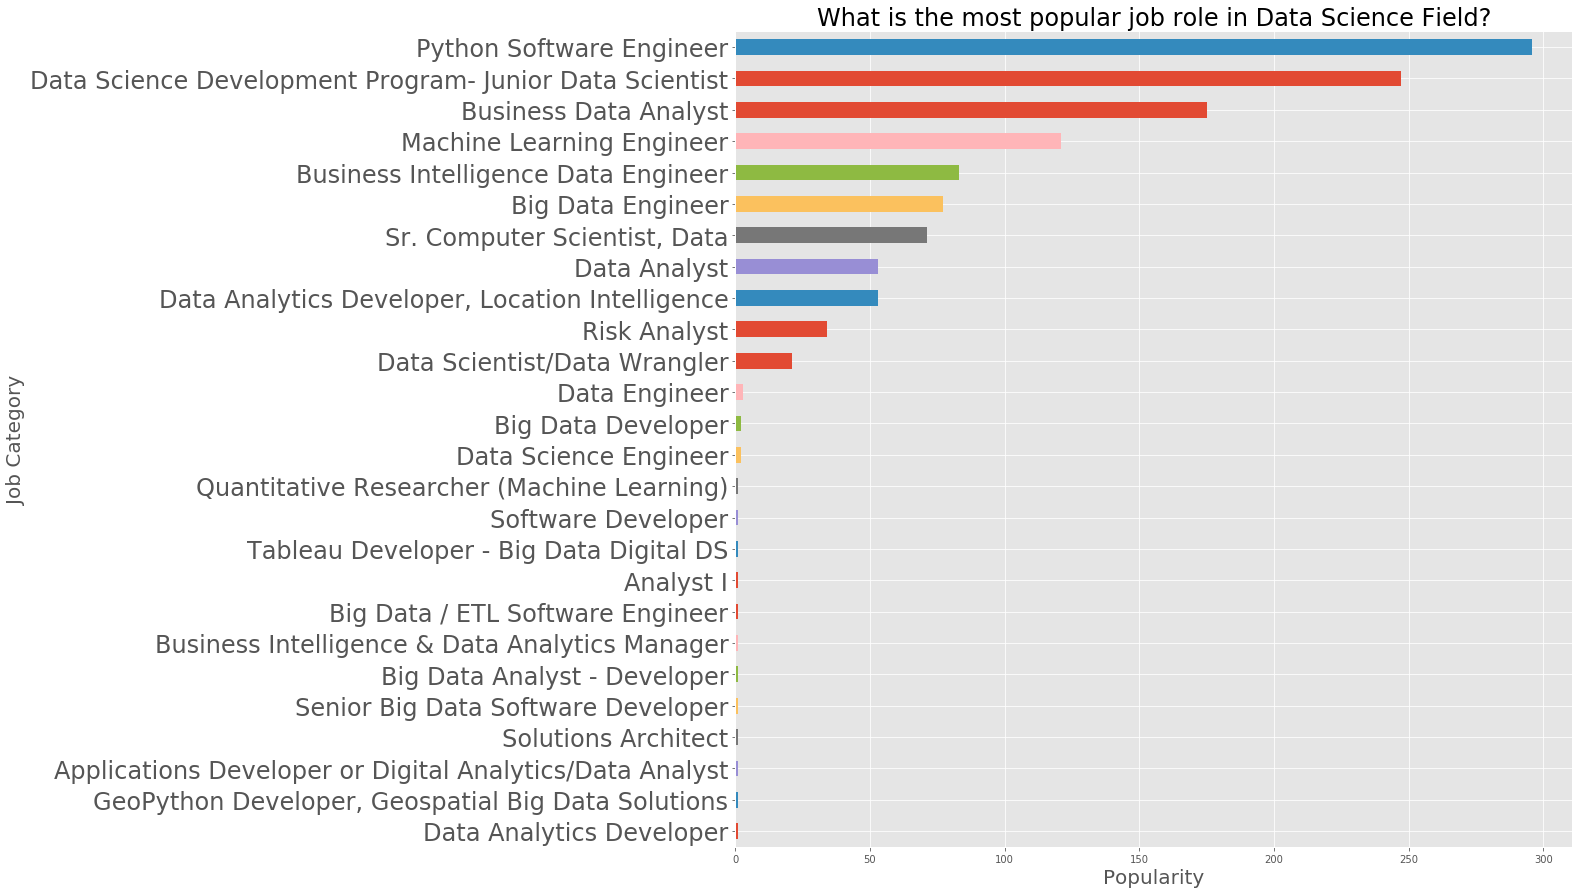

In [49]:
category_value_counts = df_job_skills.JobTitle.value_counts()
category_value_counts = category_value_counts[::-1]
category_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("What is the most popular job role in Data Science Field?", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Job Category",fontsize=20)
# change xticks fontsize to 14
plt.yticks(fontsize=24)
# finally show the plot
plt.show()

### It's look like Python Software Engineer and Data Science Development Program have more openings compare to other roles. 